In [ ]:
%pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ synthesize==2.0

In [7]:
# from tools import get_data_metrics, visualize, eval_classifier, vis_classifier
from synthesize.tools import get_data_metrics, visualize, eval_classifier, vis_classifier
import pandas as pd
import numpy as np

## BRCASubtype quality evaluation

C:\Users\Lucas\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
C:\Users\Lucas\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


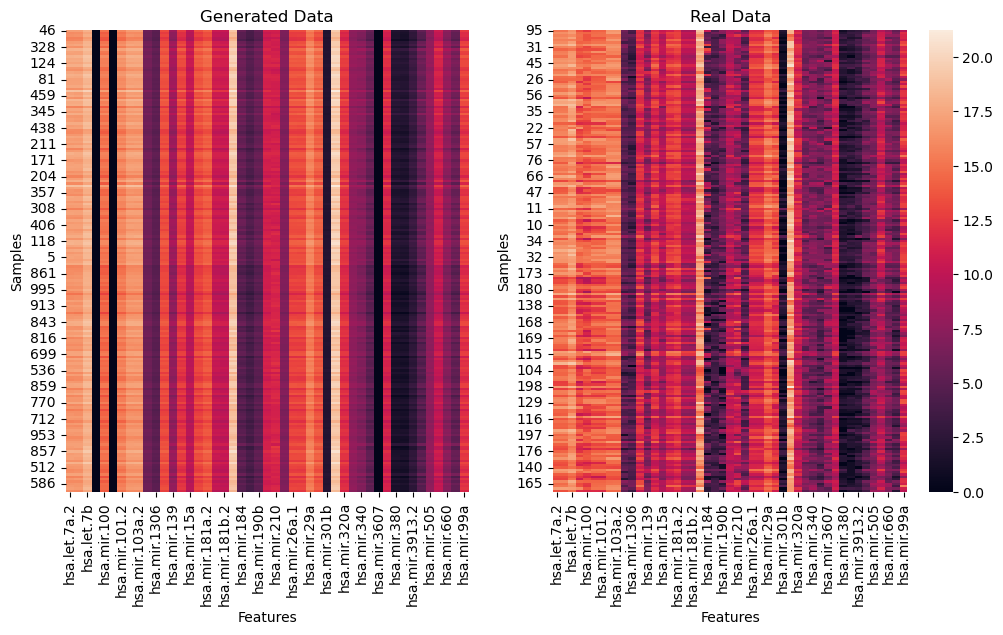

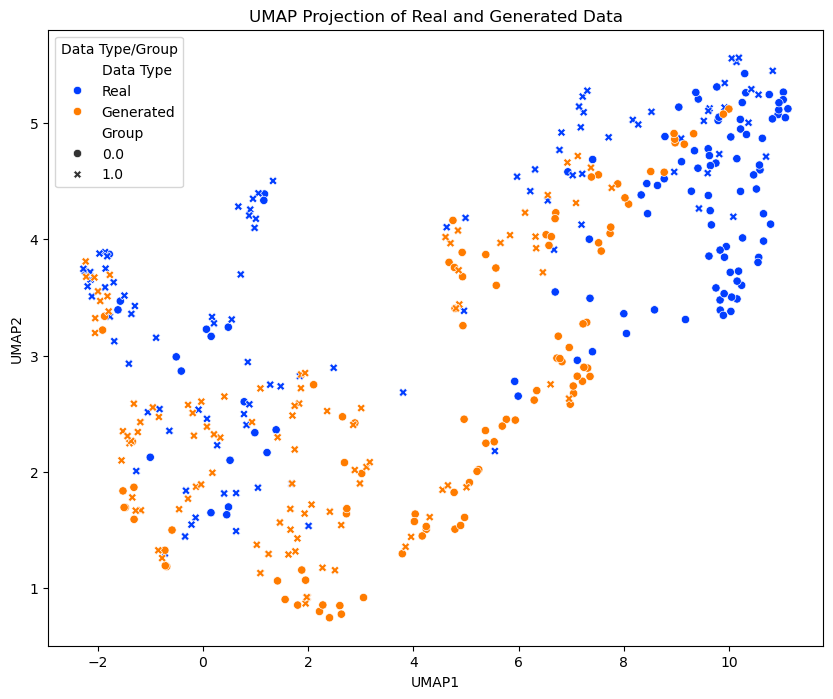

In [25]:
# === Input Real Data Description ===
# - 'samples': sample IDs (need to be removed)
# - 'groups': class labels (string or numeric; mapped to 0/1 if needed)
# - All other columns: raw feature values (e.g., expression counts)
# - The feature values in real need to be log-transformed: log2(real + 1)
real_file_name = "Case/BRCASubtypeSel_test.csv"

# === Input Generated Data Description ===
# - generated.csv has the same columns as real except for samples
# - The features are already log-transformed
# - Group labels (0 or 1) are in the last column
generated_file_name = "Case/BRCASubtypeSel_train_epoch285_CVAE1-20_generated.csv"

# Load and preprocess real and generated datasets:
# - real_data: log2-transformed numeric features from the real dataset
# - groups_real: binary-encoded labels (0/1) for the real data
# - generated_data: numeric features from the generated dataset
# - groups_generated: group labels from the generated data
# - unique_types: array of unique class labels (e.g., [0, 1])
real, groups_real, generated, groups_generated, unique_types = get_data_metrics(real_file_name, generated_file_name)

# Visualize and evaluate real vs. generated data:
# - Stratified sampling is performed within each group based on the real data
# - 'ratio' determines the fraction of real samples to visualize per class
# - Heatmaps show the expression patterns of both datasets
# - UMAP plots show group-wise structure in 2D space
# - If generated data is None, only real data is visualized
visualize(real, groups_real, unique_types, generated, groups_generated, ratio=1, seed=88)

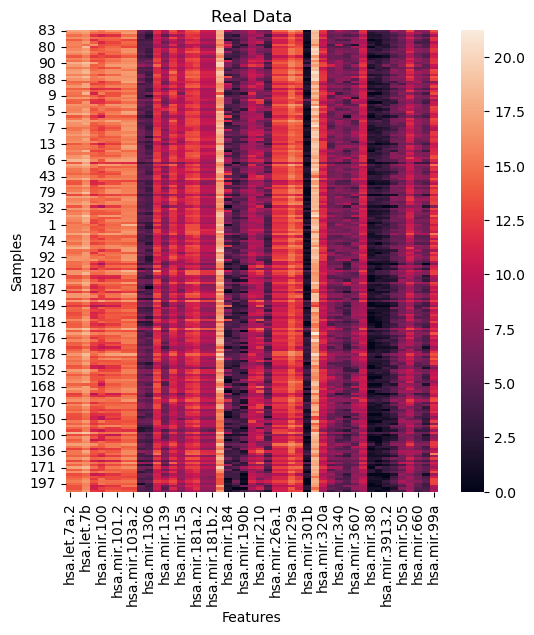

In [11]:
# If we only have the real samples...
visualize(real, groups_real, unique_types, ratio=1, seed=42)

## BRCASubtype classification accurary multiple classifier

In [13]:
# Compute sample sizes to evaluate model performance on
# ------------------------------------------------------

# Define the step size as 1/20 of the total real dataset size
step = len(real) // 20

# Create candidate sample sizes ranging from 'step' to the full size of real data
n_candidate = np.arange(step, len(real) + 1, step)

# Filter: keep only sample sizes that are at least 12 and no more than the full size
n_candidate = n_candidate[(n_candidate >= 12) & (n_candidate <= len(real))]

# Define target sizes that go beyond the candidate range (extrapolation)
# Typically used to evaluate performance predictions from fitted learning curves
n_target = np.array([n_candidate[-1] + x * step for x in range(1, 4)])
n_candidate

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200])

In [15]:
n_target

array([210, 220, 230])

In [ ]:
# Evaluate the classifier for generated data
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=30, log=True)
# Save the results to csv file if necessary
metric_generated.to_csv('metric_generated.csv', index=False)

In [ ]:
# Evaluate the classifier for real data
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=30, log=True)
# Save the results to csv file if necessary
metric_real.to_csv('metric_real.csv', index=False)

In [12]:
# If we have already saved the results
metric_generated = pd.read_csv('metric_generated.csv',header = 0)
metric_real = pd.read_csv('metric_real.csv',header = 0)

LOGIS
SVM
KNN
RF
XGB


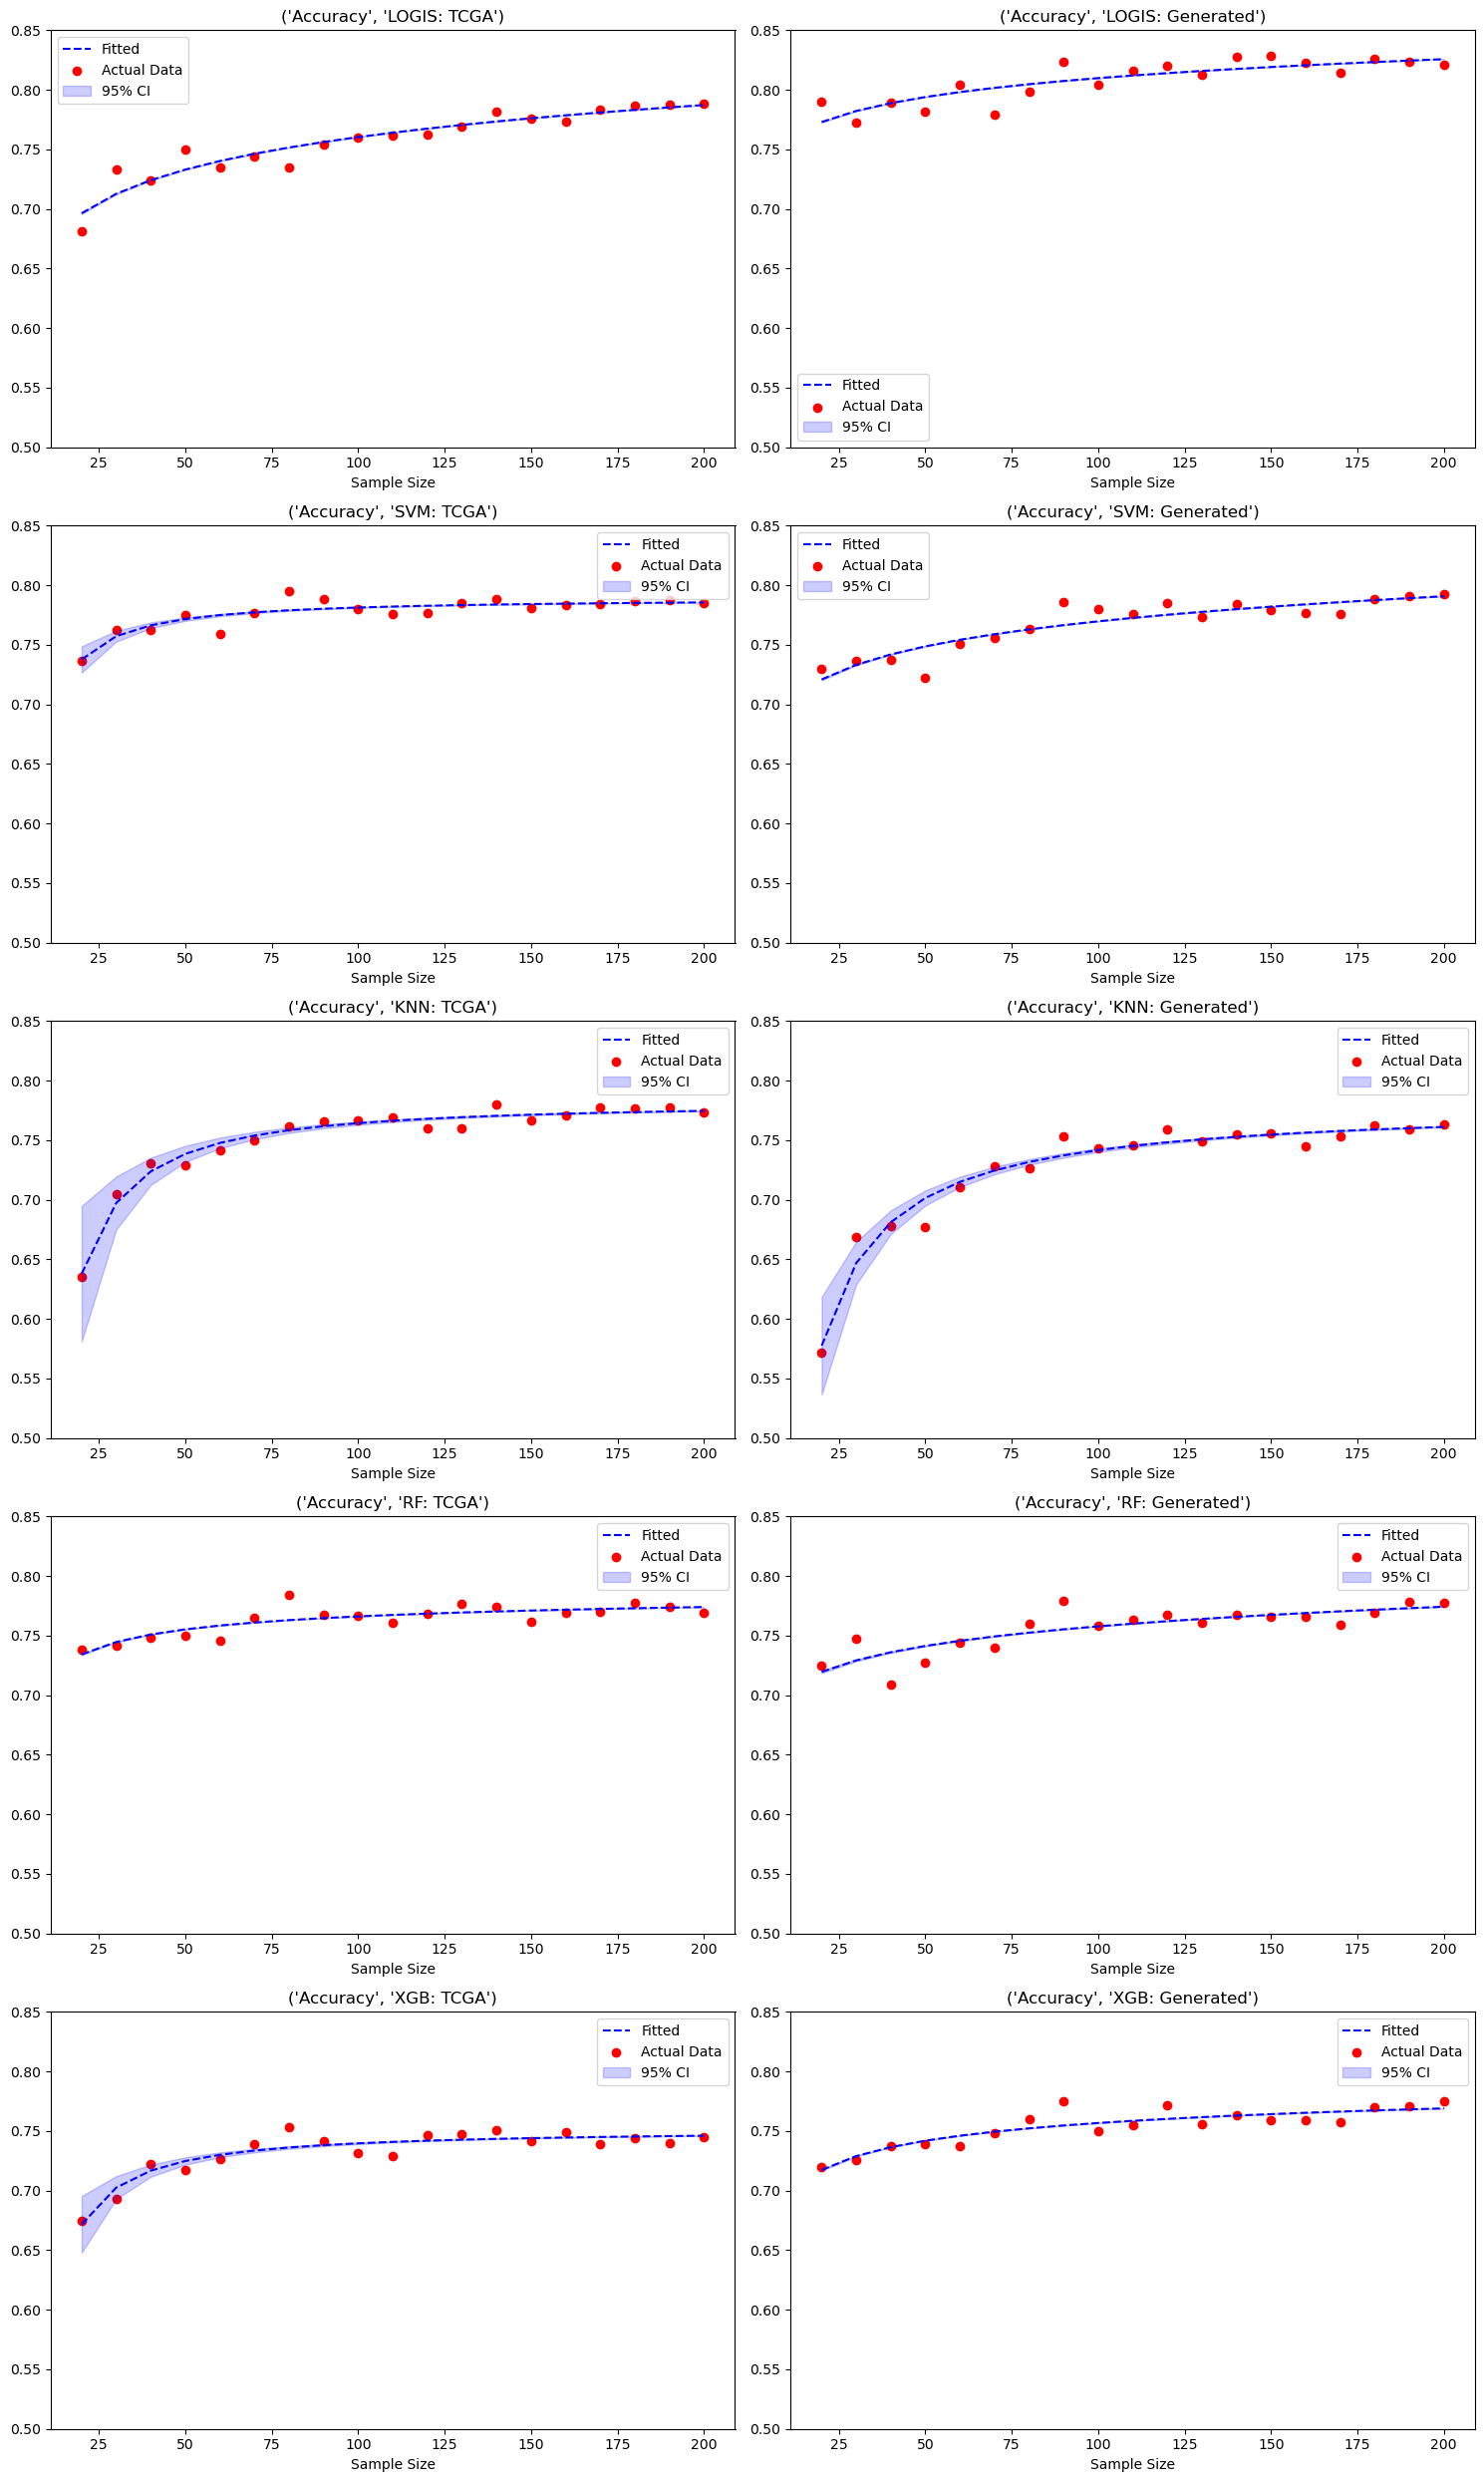

None


In [13]:
# Visualize the classifier performance
import matplotlib.pyplot as plt
p_acc = vis_classifier(metric_generated=metric_generated,
                       metric_real=metric_real,
                       n_target=n_target)

# Print the plot or result
print(p_acc)